c:\Users\mahd\Documents\SimulationRocketPy\RocketPy-master\rocketpy\motors\motor.py:918: UserWarning: burn_time argument (0, 2.505) is out of thrust source time range. Using thrust_source boundary times instead: (0.055, 2.505) s.
If you want to change the burn out time of the curve please use the 'reshape_thrust_curve' argument.
  warnings.warn(


9181.37105

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 0.06 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.707 | e1: -0.012 | e2: 0.012 | e3: -0.707
Euler Angles - Spin φ : 0.00° | Nutation θ: -2.00° | Precession ψ: -90.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: -2.81 m/s
Lateral Surface Wind Speed: 6.16 m/s


Launch Rail

Launch Rail Length: 5.918  m
Launch Rail Inclination: 88.00°
Launch Rail Heading: 90.00°


Rail Departure State

Rail Departure Time: 0.272 s
Rail Departure Velocity: 48.103 m/s
Rail Departure Stability Margin: 2.477 c
Rail Departure Angle of Attack: 7.989°
Rail Departure Thrust-Weight Ratio: 23.918
Rail Departure Reynolds Number: 4.783e+05


Burn out State

Burn out time: 2.505 s
Altitude at burn out: 557.891 m (AGL)
Rocket velocity at burn out: 342.723 m/s
Freestream velocity at burn out: 343.356 m/s
Mach Number at burn out: 0.996
Kinetic ener

'Completed 100 iterations successfully. Total CPU time: 0.078125 s. Total wall time: 118.27137899398804 s'

Number of simulations:  100



BELOW IS FROM SPACEPORT LAUNCH SITE



Apogee Altitude -         Mean Value: 2968.962 m
Apogee Altitude - Standard Deviation: 50.019 m
2851.3858880156163
3103.200757723724
7
35.97355281544397


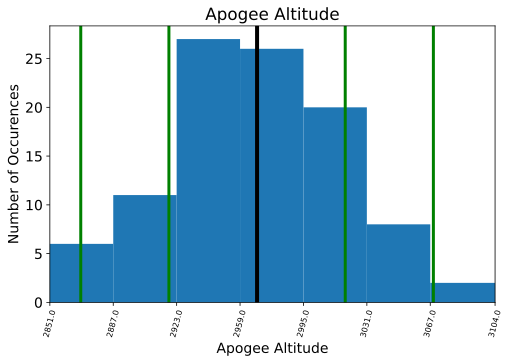

PROBABILITY THE Apogee Altitude IS IN BETWEEN 3017.52 AND 3078.48 IS: 15.16%
Out Of Rail Stability Margin -         Mean Value: 1.219 m
Out Of Rail Stability Margin - Standard Deviation: 0.061 m
1.021873826927525
1.3454252781178073
7
0.046221635884326054


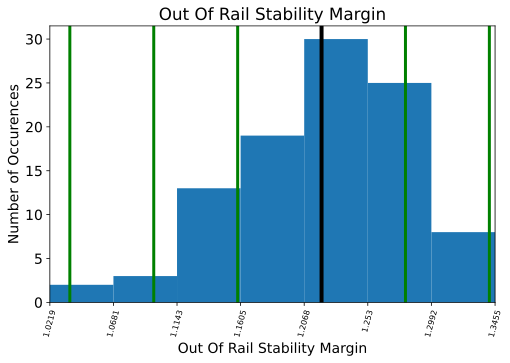

PROBABILITY THE Out Of Rail Stability Margin IS IN BETWEEN 1.5 AND 4 IS: 0.0%


'Completed 100 iterations successfully. Total CPU time: 0.1875 s. Total wall time: 67.4963927268982 s'

Number of simulations:  100



BELOW IS FROM SPACEPORT LAUNCH SITE



Apogee Altitude -         Mean Value: 2972.199 m
Apogee Altitude - Standard Deviation: 44.888 m
2862.3734054560223
3102.5603193939237
7
34.31241627684306


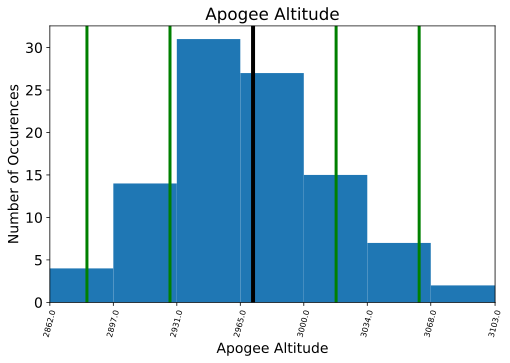

PROBABILITY THE Apogee Altitude IS IN BETWEEN 3017.52 AND 3078.48 IS: 14.74%
Out Of Rail Stability Margin -         Mean Value: 1.376 m
Out Of Rail Stability Margin - Standard Deviation: 0.065 m
1.2014598472036817
1.57440832213207
8
0.04661855936604853


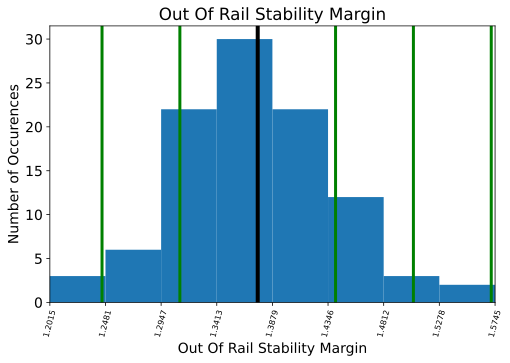

PROBABILITY THE Out Of Rail Stability Margin IS IN BETWEEN 1.5 AND 4 IS: 2.83%


'Starting'

In [ ]:
import sys
from time import process_time, time
from rocketpy import Environment, SolidMotor, Rocket, Flight
import concurrent.futures
from ConcurrentFunctions import flight_settings, export_flight_data, export_flight_error, runFlightWithMonteCarlo
from IPython.display import display
from scipy.stats import norm

import imageio.v2 as imageio
from matplotlib.patches import Ellipse

import ssl
import certifi

%config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt

from rocketpy.plots import flight_plots

%matplotlib inline
mpl.rcParams["figure.figsize"] = [8, 5]
mpl.rcParams["figure.dpi"] = 120
mpl.rcParams["font.size"] = 14
mpl.rcParams["legend.fontsize"] = 14
mpl.rcParams["figure.titlesize"] = 14

import numpy as np
from numpy.random import normal, choice

import logging

import openpyxl

# Define variable to load the dataframe
dataframe = openpyxl.load_workbook("WeatherData.xlsx")

# Define variable to read sheet
dataframe1 = dataframe.active

# Iterate the loop to read the cell values

env = Environment(latitude=0, longitude=0, elevation = 0)

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time
env.set_atmospheric_model(type="Forecast", file = "GFS")
# env.info()

dryMass = 3.197
grainInner =(39.37*10**-3)/2
grainOuter =(82.27*10**-3)/2
density = dryMass / ((np.pi*grainOuter**2)-(np.pi*grainInner**2))
grainHeight = 0.1524
numGrain = 6
totalHeight = grainHeight*numGrain
centralAxis = (0.08333)*dryMass*(grainOuter)**2
centralDiameter = ((1/4)*dryMass*(grainOuter)**2) + (1/12)*dryMass*(totalHeight)**2

MotorOne = SolidMotor(
    thrust_source= "thrustcurve.csv",
    dry_mass= dryMass,
    dry_inertia= (centralAxis,centralAxis,centralDiameter),
    nozzle_radius= (79.32*10**-3)/2 ,
    grain_number= numGrain,
    grain_density= density,
    grain_outer_radius= grainOuter ,
    grain_initial_inner_radius= grainInner,
    grain_initial_height= grainHeight,
    grain_separation= 0,
    grains_center_of_mass_position= 0,
    center_of_dry_mass_position= 0,
    nozzle_position= grainHeight*3.3,
    burn_time= 2.505,
    throat_radius= (29.21*10**-3)/2,
    coordinate_system_orientation="combustion_chamber_to_nozzle",
)

# M1850W.all_info()

#Pretty Much done except grain density and maybe nozzle position

spMass = 16.6
spRadius = 0.155/2
spLength = .152 + .305 + .559 + .508 + .356 + .152

spCentralAxis = (1/12)*spMass*(spRadius)**2
spCentralDiameter = ((1/4)*spMass*(spRadius)**2) + (1/12)*spMass*(spLength)**2

Sp25 = Rocket(
    mass = spMass,
    radius = spRadius,
    inertia = (spCentralDiameter,spCentralDiameter,spCentralAxis), # Calculated via Open Rocket
    coordinate_system_orientation = "nose_to_tail",
    center_of_mass_without_motor = 1.93 , #OpenRocket
    power_off_drag ="Sp25CDOFF10.31.csv", #RAS Aero
    power_on_drag ="Sp25CDON10.31.csv"
)

nose_cone = Sp25.add_nose(length = 0.813, kind = "von karman", position = 0)

fin_set = Sp25.add_trapezoidal_fins(n=4,root_chord=0.279,tip_chord=0.091, span=0.216,fin_Position=2.62,cant_angle=0,sweep_length=0.173)
boattailPos = 0.813+0.152+0.305+0.559+0.508+0.356+0.152
boattail = Sp25.add_tail(top_radius = spRadius,bottom_radius = 0.127/2,length = 0.203,position = boattailPos)

Sp25.add_motor(MotorOne,spLength + nose_cone.length + grainHeight/2 - (totalHeight)/2)
topRB = 2.77-0.26-0.26
rail_buttons = Sp25.set_rail_buttons(
    upper_button_position= topRB,
    lower_button_position= 2.77,
    angular_position=135
)
drogueRadius = 0.61/2

Drogue = Sp25.add_parachute(
    "Drogue",
    cd_s = 0.97*3.1415*(drogueRadius)**2,
    trigger = "apogee"
)
lightRadius = 3.05/2
Light = Sp25.add_parachute(
    "Light",
    cd_s = 2.2*3.1415*(lightRadius)**2,
    trigger = 450
)

test_flight = Flight(
    rocket=Sp25, environment=env ,rail_length = 5.7-(spLength-topRB),inclination = 88,heading =90
)
print(str(MotorOne.total_impulse))
meanTemp = 60

envParams = {
    "latitude": 32.9823279,
    "longitude": -106.9490122,
    "elevation": 1400.556,
    "type": "custom_atmosphere",
    "file": None
}

analysis_parameters = {
    # Rocket's dry mass without motor (kg) and its uncertainty (standard deviation)
    "rocket_mass": (Sp25.mass, 0.001),
    # Rocket's inertia moment perpendicular to its axis (kg*m^2)
    "rocket_inertia_11": (Sp25.I_11_without_motor, 0.036),
    # Rocket's inertia moment relative to its axis (kg*m^2)
    "rocket_inertia_33": (Sp25.I_33_without_motor, 0.00001),
    # Motors's dry mass without propellant (kg) and its uncertainty (standard deviation)
    "motor_dry_mass": (MotorOne.dry_mass, 0.001),
    # Motor's dry inertia moment perpendicular to its axis (kg*m^2)
    "motor_inertia_11": (MotorOne.dry_I_11, 0.016),
    # Motors's dry inertia moment relative to its axis (kg*m^2)
    "motor_inertia_33": (MotorOne.dry_I_33, 0.00001),
    # Distance between rocket's center of dry mass and motor's center of dry mass (m)

    # THIS is likely wrong, go back to check it

    "motor_dry_mass_position": (Sp25.motor_center_of_dry_mass_position, 0.001),
    # Motor total impulse (N*s)
    "impulse": (MotorOne.total_impulse, 25.3),
    # Motor burn out time (s)
    "burn_time": (MotorOne.burn_time[1], .3),
    # Motor's nozzle radius (m)
    "nozzle_radius": (MotorOne.nozzle_radius, 0.5 / 1000),
    # Motor's nozzle throat radius (m)
    "throat_radius": (MotorOne.throat_radius, 0.5 / 1000),
    # Motor's grain separation (axial distance between two grains) (m)
    "grain_separation": (MotorOne.grain_separation, 1 / 1000),
    # Motor's grain density (kg/m^3)
    "grain_density": (MotorOne.grain_density, 20),
    # Motor's grain outer radius (m)
    "grain_outer_radius": (MotorOne.grain_outer_radius, 0.3 / 1000),
    # Motor's grain inner radius (m)
    "grain_initial_inner_radius": (MotorOne.grain_initial_inner_radius, 0.3 / 1000),
    # Motor's grain height (m)
    "grain_initial_height": (MotorOne.grain_initial_height, 1 / 1000),
    # Rocket's radius (kg*m^2)
    "radius": (Sp25.radius, 0.001),
    # Distance between rocket's center of dry mass and nozzle exit plane (m) (negative)
    "nozzle_position": (Sp25.center_of_dry_mass_position-Sp25.nozzle_position, 0.001),
    # Distance between rocket's center of dry mass and and center of propellant mass (m) (negative)
    "grains_center_of_mass_position": (Sp25.center_of_dry_mass_position-(MotorOne.center_of_dry_mass_position + Sp25.motor_position), 0.0001),

    # Multiplier for rocket's drag curve. Usually has a mean value of 1 and a uncertainty of 5% to 10%
    "power_off_drag": (1, 0.05),
    # Multiplier for rocket's drag curve. Usually has a mean value of 1 and a uncertainty of 5% to 10%
    "power_on_drag": (1, 0.05),
    # Axial distance between rocket's center of dry mass and nearest point in its nose cone (m)
    "nose_distance_to_CM": (Sp25.center_of_dry_mass_position-nose_cone.length, 0.001),
    # Axial distance between rocket's center of dry mass and nearest point in its fin (m)
    "fin_distance_to_CM": (fin_set.fin_Position - Sp25.center_of_dry_mass_position, 0.001),
    # Launch rail inclination angle relative to the horizontal plane (degrees)
    "inclination": (test_flight.inclination, 1),
    # Launch rail heading relative to north (degrees)
    "heading": (test_flight.heading, 2),
    # Drag coefficient times reference area for the drogue chute (m^2)
    "cd_s_drogue": (Drogue.cd_s, 0.02),
    # Time delay between parachute ejection signal is detected and parachute is inflated (s)
    "lag_rec": (Drogue.lag, 0.2),
    # Time delay between sensor signal is received and ejection signal is fired (s)
    "lag_se": (Drogue.lag, 0.1),
    # temperature in kelvin
    "temperature": ((meanTemp - 32) * 5/9 + 273.15, 2.5),
    # atmospheric pressure in pascals
    "atmosphere_pressure": (env.pressure_ISA.get_value(envParams["elevation"]), 300),
    # wind speed correspondign with u-vector in m/s
    "wind_u_speed": (0, 1),
    # wind speed corresponding with v-vector in m/s
    "wind_v_speed": (0, 1)
}
test_flight.info()
print("\n\n\nfirst flight done, out of rail stability: " + str(test_flight.out_of_rail_stability_margin) + "\n\n\n")


# M1850W.all_info()

def setup_logging():
    class MyHandler(logging.FileHandler):
        def emit(self, record):
            super().emit(record)  # Call the superclass's emit method
            self.flush()  # Flush after each log message

    # Use your custom handler
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    handler = MyHandler('app.log', 'a')
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)
    logger.addHandler(handler)

def createDistributionPlot(dispersonResultArray, name, lowerProbBound, upperProbBound, maxDecimals):
    mean = np.mean(dispersonResultArray)
    deviation = np.std(dispersonResultArray)
    print(
        f'{name} -         Mean Value: {mean:0.3f} m'
    )
    print(
        f'{name} - Standard Deviation: {deviation:0.3f} m'
    )

    minimum = np.min(dispersonResultArray)
    print(minimum)
    maximum = np.max(dispersonResultArray)
    print(maximum)
    theBins = list()

    #using scott's rule to find the number of bins
    binWidth = 3.5 * deviation / np.power(len(dispersonResultArray), 1/3)
    numBins = int(np.round((maximum-minimum)/binWidth))

    print(numBins)
    changeInZ = (maximum - minimum) / numBins
    print(changeInZ)
    #test add
    zIterator = minimum
    for iterator in range(numBins):
        theBins.append(zIterator)
        zIterator += changeInZ
    finalValue = np.ceil(zIterator * np.power(10, maxDecimals)) / np.power(10, maxDecimals)
    theBins.append(finalValue)
    plt.figure()
    plt.xlim(minimum, maximum)
    minTextSize = 8
    maxTickCount = 50
    xTickBins = theBins
    if(numBins > maxTickCount):
        xTickBins = list()
        changeInZ = (maximum - minimum) / 50.0
        zIterator = minimum
        for iterator in range(50):
            xTickBins.append(zIterator)
            zIterator += changeInZ
    binListToString = list()
    for currentBin in xTickBins:
        binListToString.append(str(round(currentBin, maxDecimals)))
    plt.xticks(ticks = xTickBins, labels = binListToString, rotation = 75, fontsize = minTextSize)
    plt.hist(dispersonResultArray, bins=theBins)
    plt.title(name)
    plt.xlabel(name)
    plt.ylabel("Number of Occurences")

    plt.axvline(mean, color='k', linestyle='solid', linewidth=4)
    plt.axvline(mean - deviation, color='g', linestyle='solid', linewidth=3)
    plt.axvline(mean - 2*deviation, color='g', linestyle='solid', linewidth=3)
    plt.axvline(mean - 3*deviation, color='g', linestyle='solid', linewidth=3)
    plt.axvline(mean + deviation, color='g', linestyle='solid', linewidth=3)
    plt.axvline(mean + 2*deviation, color='g', linestyle='solid', linewidth=3)
    plt.axvline(mean + 3*deviation, color='g', linestyle='solid', linewidth=3)
    plt.show()
    lowerZ = (lowerProbBound - mean)/deviation
    upperZ = (upperProbBound - mean)/deviation
    probabilityInRange = norm.cdf(upperZ) - norm.cdf(lowerZ)
    print("PROBABILITY THE " + name +  " IS IN BETWEEN " + str(round(lowerProbBound, 4)) + " AND " + str(round(upperProbBound, 4)) + " IS: " + str(round(probabilityInRange * 100, 2)) + "%")

currentRow = 1
# envParams["file"] = row[0].value

#range only accepts integer values, so for now we make them integers and divide them later
for finDistance in range (2500, 2700, 25):
    setup_logging()
    analysis_parameters["fin_distance_to_CM"] = ((finDistance/1000) - Sp25.center_of_dry_mass_position, 0.000)
    # env.all_info()
    # Create data files for inputs, outputs and error logging
    filename = "MonteCarlo" + str(finDistance)
    MonteCarloErrorFile = open(str(filename) + ".Errors.txt", "w")
    MonteCarloInputFile = open(str(filename) + ".Input.txt", "w")
    MonteCarloOutputFile = open(str(filename) + ".Output.txt", "w")

    initial_wall_time = time()
    initial_cpu_time = process_time()
    # Iterate over flight settings
    out = display("Starting", display_id=True)
    number_of_simulations = 100
    totalProcesses = 20
    simsPerProcess = number_of_simulations / totalProcesses

    #start multiprocessing
    if __name__ == "__main__":
        with concurrent.futures.ProcessPoolExecutor(max_workers=totalProcesses) as executor:
            results = [executor.submit(runFlightWithMonteCarlo, simsPerProcess, envParams, analysis_parameters, initial_cpu_time) for _ in range(totalProcesses)] 
            for result in concurrent.futures.as_completed(results):
                MonteCarloInputFile.write(result.result()[0] + "\n")
                MonteCarloOutputFile.write(result.result()[1] + "\n")
                MonteCarloErrorFile.write(result.result()[2] + "\n")

    ## Print and save total time
    final_string = f"Completed {number_of_simulations} iterations successfully. Total CPU time: {process_time() - initial_cpu_time} s. Total wall time: {time() - initial_wall_time} s"
    out.update(final_string)
    MonteCarloInputFile.write(final_string + "\n")
    MonteCarloOutputFile.write(final_string + "\n")
    MonteCarloErrorFile.write(final_string + "\n")

    ## Close files
    MonteCarloInputFile.close()
    MonteCarloOutputFile.close()
    MonteCarloErrorFile.close()

    # Initialize variable to store all results
    dispersion_general_results = []

    dispersion_results = {
        "out_of_rail_time": [],
        "out_of_rail_velocity": [],
        "apogee_time": [],
        "apogee_altitude": [],
        "apogee_x": [],
        "apogee_y": [],
        "impact_time": [],
        "impact_x": [],
        "impact_y": [],
        "impact_velocity": [],
        "initial_static_margin": [],
        "out_of_rail_static_margin": [],
        "out_of_rail_stability_margin": [],
        "final_static_margin": [],
        "number_of_events": [],
        "max_velocity": [],
        "drogue_triggerTime": [],
        "drogue_inflated_time": [],
        "drogue_inflated_velocity": [],
        "execution_time": [],
    }

    # Get all dispersion results
    # Get file
    dispersion_output_file = open(str(filename) + ".Output.txt", "r+")

    # Read each line of the file and convert to dict
    for line in dispersion_output_file:
        # Skip comments lines
        if line[0] != "{":
            continue
        # Eval results and store them
        flight_result = eval(line)
        dispersion_general_results.append(flight_result)
        for parameter_key, parameter_value in flight_result.items():
            dispersion_results[parameter_key].append(parameter_value)

    # Close data file
    dispersion_output_file.close()

    # Print number of flights simulated
    N = len(dispersion_general_results)
    print("Number of simulations: ", N)

    if currentRow <= 2:
        img = plt.imread("SpaceportLaunchSite.png")
        print("\n\n\nBELOW IS FROM SPACEPORT LAUNCH SITE\n\n\n")
    else:
        img = plt.imread("SeymourLaunchSite.png")
        print("\n\n\nBELOW IS FROM SEYMOUR LAUNCH SITE\n\n\n")
    # Import background map


    # Retrieve dispersion data por apogee and impact XY position
    apogee_x = np.array(dispersion_results["apogee_x"])
    apogee_y = np.array(dispersion_results["apogee_y"])
    impact_x = np.array(dispersion_results["impact_x"])
    impact_y = np.array(dispersion_results["impact_y"])

    createDistributionPlot(dispersion_results["apogee_altitude"], "Apogee Altitude", 9900 * 0.3048, 10100 * 0.3048, 0)

    createDistributionPlot(dispersion_results["out_of_rail_stability_margin"], "Out Of Rail Stability Margin", 1.5, 4, 4)
    # currentRow+=1